<a href="https://colab.research.google.com/github/prdurgam-edu/DataScience_CourseWork/blob/main/AurelienGeron_02_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [26]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier


Data Loading

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X,y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

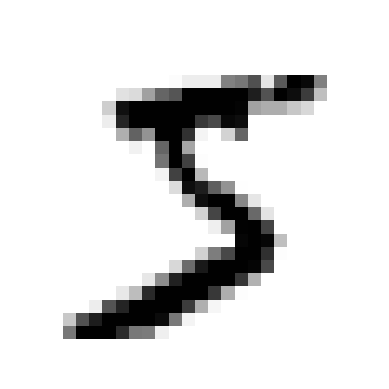

In [ ]:
some_digit = X.iloc[0].values
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [ ]:
y=y.astype(np.uint8)

Train test split

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Training Binary Classifier

In [ ]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

y_train_5.head()

,class
0,True
1,False
2,False
3,False
4,False


In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

Accuracy

In [ ]:
skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf=clone(sgd_clf)
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = y_train_5.iloc[train_index]
  X_test_folds = X_train.iloc[test_index]
  y_test_folds = y_train_5.iloc[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_folds)
  n_correct = sum(y_pred== y_test_folds)
  print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [ ]:
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X),1),dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [ ]:
y_train_pred= cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [ ]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3, method="decision_function")

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

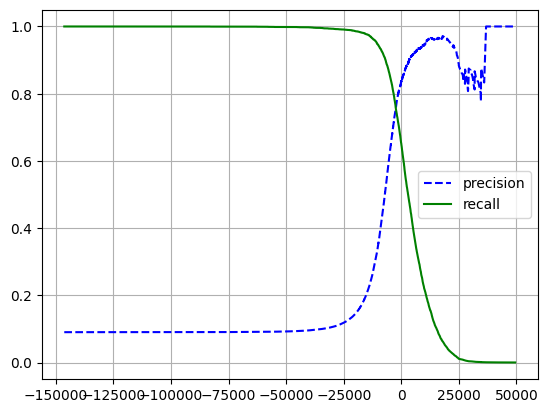

In [ ]:
plt.plot(thresholds, precisions[:-1],"b--", label="precision")
plt.plot(thresholds, recalls[:-1],"g-", label="recall")
plt.legend()
plt.grid()
plt.show()

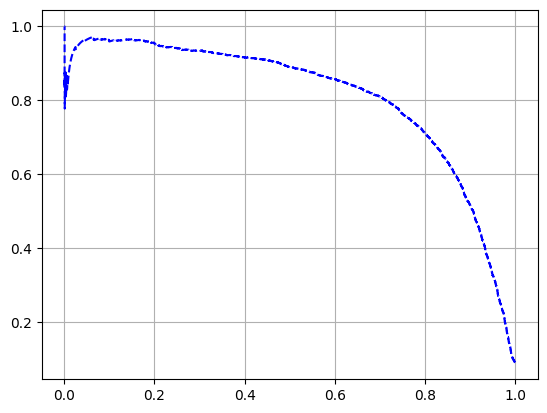

In [ ]:
plt.plot(recalls[:-1], precisions[:-1],"b--")
plt.grid()
plt.show()

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]
print(threshold_90_precision)

3370.0194991439557


In [ ]:
y_train_pred_90= (y_scores>=threshold_90_precision)

print(precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90))

0.9000345901072293 0.4799852425751706


In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

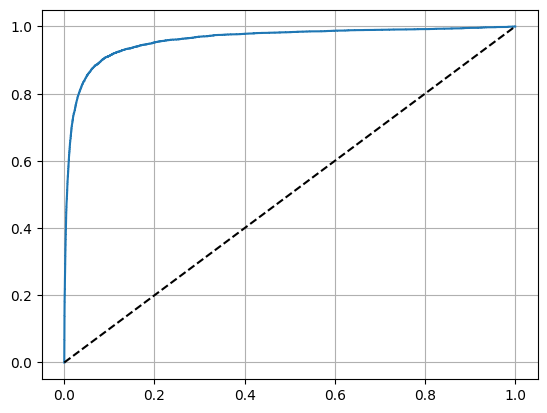

In [ ]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "k--")
plt.grid()


In [ ]:
svm_clf= SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [ ]:
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)